# Hoja de Ejercicios análisis exploratorio 

In [ ]:
%pip install pandas numpy matplotlib scipy statsmodels
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm

ModuleNotFoundError: No module named 'pandas'

In [2]:
# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)
# Configuración para mostrar todas las filas
pd.set_option('display.max_rows', None)


#### Leer datos de un csv

In [3]:
datos=pd.read_csv("cars.csv")

In [14]:
datos.shape

(205, 26)

In [6]:
datos.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


#### Hacer un resumen del set de datos

In [4]:
datos.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [10]:
# datos['symboling'].unique()

In [15]:
# datos[datos['symboling'] == -1]
# datos[datos['price'].isna()]

In [50]:
datos.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

## Descripción de Columnas
1. symboling:
Índice de riesgo de seguro para el automóvil. Valores más altos indican mayor riesgo.
Interesante si: Quieres analizar riesgos asociados con otras características.

2. normalized_losses:
Pérdidas relativas normalizadas en seguros. Valores faltantes son comunes en algunos datasets.
Interesante si: Quieres investigar el impacto de características en los costos de seguro.

3. make:
Marca del automóvil, como Toyota, BMW, etc.
Interesante si: Analizas preferencias por marca o comparas su relación con precio, desempeño, etc.

4. fuel_type:
Tipo de combustible: gasolina o diésel.
Interesante si: Analizas eficiencia de combustible, emisiones o costos.

5. aspiration:
Tipo de aspiración: estándar o turbo.
Interesante si: Quieres estudiar impacto del turbo en desempeño y precio.

6. num_of_doors:
Número de puertas: 2 o 4.
Interesante si: Quieres investigar preferencias por diseño y correlación con precio.

7. body_style:
Estilo de la carrocería: sedán, hatchback, etc.
Interesante si: Analizas preferencias de diseño y su impacto en ventas o precio.

8. drive_wheels:
Tipo de tracción: delantera (fwd), trasera (rwd) o tracción en las cuatro ruedas (4wd).
Interesante si: Estudias desempeño en diferentes terrenos y su relación con precio.

9. engine_location:
Ubicación del motor: delantera o trasera.
Interesante si: Analizas cómo afecta la ubicación del motor al diseño y desempeño.

10. wheel_base:
Distancia entre los ejes del automóvil (en pulgadas).
Interesante si: Quieres estudiar su impacto en estabilidad y comodidad.

11. length, width, height:
Dimensiones del vehículo (en pulgadas).
Interesante si: Quieres investigar diseño, espacio interior y desempeño.

12. curb_weight:
Peso del vehículo vacío.
Interesante si: Analizas su relación con consumo de combustible, desempeño y seguridad.

13. engine_type:
Tipo de motor: ohc, ohcf, dohc, etc.
Interesante si: Estudias impacto del diseño del motor en desempeño y costo.

14. num_of_cylinders:
Número de cilindros del motor.
Interesante si: Analizas desempeño, consumo y emisiones.

15. engine_size:
Tamaño del motor en centímetros cúbicos (cc).
Interesante si: Estudias relación con potencia, consumo y precio.

16. fuel_system:
Sistema de combustible: inyección, carburador, etc.
Interesante si: Quieres analizar eficiencia y tecnología.

17. bore y stroke:
Bore: Diámetro del cilindro.
Stroke: Longitud de carrera del pistón.
Interesante si: Analizas diseño del motor y relación con potencia y eficiencia.

18. compression_ratio:
Relación de compresión del motor.
Interesante si: Quieres estudiar eficiencia térmica y necesidades de combustible.

19. horsepower:
Potencia del motor en caballos de fuerza.
Interesante si: Analizas desempeño y su impacto en precio.

20. peak_rpm:
Revoluciones por minuto (RPM) donde el motor alcanza su máxima potencia.
Interesante si: Estudias relación con diseño y desempeño.

21. city_mpg y highway_mpg:
Eficiencia de combustible en ciudad y carretera (millas por galón).
Interesante si: Quieres investigar consumo de combustible en diferentes condiciones.

22. price:
Precio del automóvil.
Interesante si: Estudias factores que influyen en el precio y predicciones.


In [51]:
print(datos.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [52]:
# Recuento de valores nulos
print(datos.isnull().sum())


symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64


In [28]:
# revisión de valores duplicados
print(datos.duplicated().sum())


0


In [58]:
# Valores únicos por categorías
print(datos['body_style'].value_counts())

body_style
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64


#### Calcular la media de la columna city_mpg

In [16]:
np.mean(datos["city_mpg"])

np.float64(25.21951219512195)

# REALICEMOS UNOS ANÁLISIS INTERESANTES...

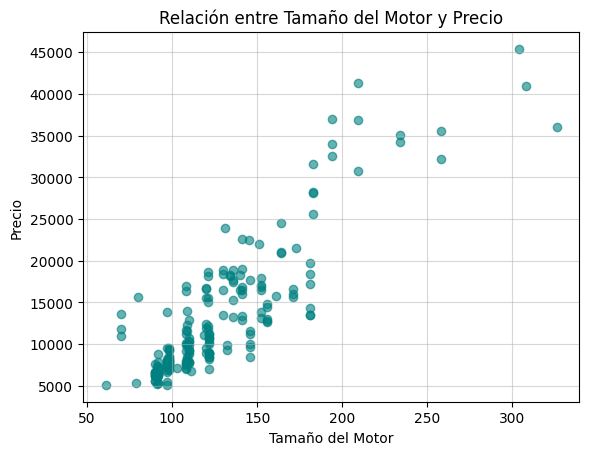

In [ ]:
# Relación entre Tamaño del Motor y Precio
plt.scatter(datos['engine_size'], datos['price'], color='teal', alpha=0.6)
plt.title('Relación entre Tamaño del Motor y Precio')
plt.xlabel('Tamaño del Motor')
plt.ylabel('Precio')
plt.grid(alpha=0.5)
plt.show()

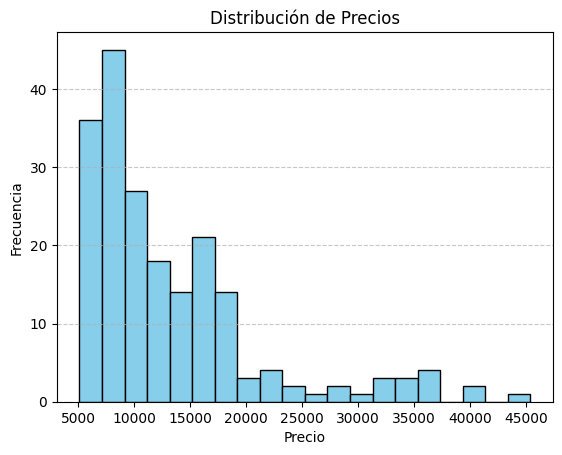

In [ ]:
# Distribuación de Precios
plt.hist(datos['price'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

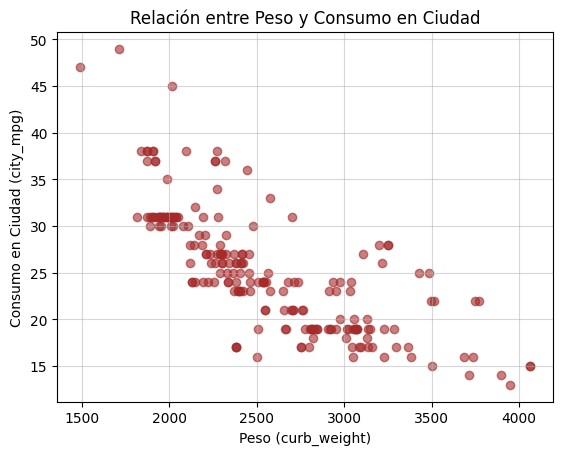

In [19]:
# Relación entre Peso y consumo 
plt.scatter(datos['curb_weight'], datos['city_mpg'], color='brown', alpha=0.6)
plt.title('Relación entre Peso y Consumo en Ciudad')
plt.xlabel('Peso (curb_weight)')
plt.ylabel('Consumo en Ciudad (city_mpg)')
plt.grid(alpha=0.5)
plt.show()

# Piensa... 
# ¿Nos sirve de algo? ¿Qué conclusiones puedo sacar de esto?

#### 1.	¿Cuántos carros tipo hatchback tiene la muestra? 

#### 2.	¿Cuál es el promedio de pérdidas de los carros convertibles? Obvie los carros que tienen valores NA en el atributo “normalized_losses” 

#### Crea un nuevo data frame con el promedio del indicador de riesgo y de las pérdidas por marca de carro

#### a)	Cámbiele los nombres a las columnas del data frame peligrosos

#### b)	Guarde en una nueva variable los datos que no tienen NA en el promedio de las pérdidas. Esta variable será la que usará para los siguientes ejercicios.

#### c)	Haga un DF con el promedio de pérdidas normalizadas de cada una de las marcas de carros.

#### d)	Utilice el DF creado en el inciso anterior para hacer un gráfico de barras que permita visualizar las marcas que más pérdidas han tenido. 

Nota: El gráfico debe tener un título, un color diferente por cada barra, además de la marca
correspondiente a cada barra. 

RESPONDA: 

a. ¿Cuáles podrían decirse que eran las marcas de carros de menor riesgo en la época en que fueron
obtenidos los datos? ¿Por qué?

b. ¿Cuáles podrían decirse que eran las marcas de carros de mayor riesgo en la época en que fueron
obtenidos los datos? ¿Por qué?

#### f)	Investigue un poco más el conjunto de datos:

*a.	Explique cómo se distribuyen los datos en las variables cuantitativas. Saque medidas de tendencia central y dispersión y orden*

*b.	¿Se puede decir que las variables cuantitativas siguen una distribución normal?* 
Argumente qué tipo de gráficos los ayudarán a determinar esto

*c. ¿Hay **correlaciones** entre algunas de las variables?*

¿Qué puede concluir de la variable **normalized_losses**? ¿Será que sigue una distribución normal, al menos desde el punto de vista gráfico?

##### Continuaremos el Viernes 23/01 analizando tests de normalidad....